# Breast Cancer Predictor

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Modeling Libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.iloc[0]

id                           842302
diagnosis                         M
radius_mean                   17.99
texture_mean                  10.38
perimeter_mean                122.8
area_mean                    1001.0
smoothness_mean              0.1184
compactness_mean             0.2776
concavity_mean               0.3001
concave points_mean          0.1471
symmetry_mean                0.2419
fractal_dimension_mean      0.07871
radius_se                     1.095
texture_se                   0.9053
perimeter_se                  8.589
area_se                       153.4
smoothness_se              0.006399
compactness_se              0.04904
concavity_se                0.05373
concave points_se           0.01587
symmetry_se                 0.03003
fractal_dimension_se       0.006193
radius_worst                  25.38
texture_worst                 17.33
perimeter_worst               184.6
area_worst                   2019.0
smoothness_worst             0.1622
compactness_worst           

In [4]:
var=df['diagnosis']
df = df.drop(['id', 'Unnamed: 32','diagnosis'], axis=1)
df['diagnosis']=var
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [5]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [6]:
print(df['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [7]:
df['diagnosis'] = df['diagnosis'].apply({'M':0,'B':1}.get) 

In [8]:
print(df['diagnosis'].value_counts())

1    357
0    212
Name: diagnosis, dtype: int64


In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
list(df.columns)[:-1]

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [11]:
for col in df.columns:
    if col in list(df.columns)[:-1]:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))
        

In [12]:
print(df['diagnosis'].value_counts())

1    357
0    212
Name: diagnosis, dtype: int64


In [13]:
# Data Preparation
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [14]:
x.shape,y.shape

((569, 30), (569,))

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[0.05152242 0.01851153 0.03888684 0.05218217 0.01032342 0.02644098
 0.05217382 0.08037391 0.00633438 0.00556235 0.03589388 0.00543732
 0.01576678 0.04711337 0.0067651  0.00617084 0.00712688 0.01267621
 0.00571191 0.00625864 0.07978695 0.02237431 0.09155607 0.09882803
 0.01809171 0.03130898 0.0355597  0.10740249 0.01366238 0.01019663]


In [16]:
feature_importance = pd.DataFrame(model.feature_importances_)
lst=list(feature_importance.sort_values(0,ascending=False).head(10).index)
lst.sort()
lst=[0, 2, 3, 6, 7, 20, 22, 23, 26, 27]

In [17]:
x = x[:,lst]

In [18]:
for i in lst:
    print(df.columns[i])
    #print(df[df.columns[i]].value_counts())

radius_mean
perimeter_mean
area_mean
concavity_mean
concave points_mean
radius_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst


In [19]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [20]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (455, 10)
X_test shape: (114, 10)
Y_train shape: (455,)
Y_test shape: (114,)


In [21]:
def evaluate_model(models):
   
    result_train = []
    result_test = []
    for model in models :
        trained_model = model.fit(X_train, Y_train)
        Y_pred = trained_model.predict(X_test)
        accuracy_test = accuracy_score(Y_test, Y_pred)
        accuracy_train = accuracy_score(Y_train, trained_model.predict(X_train))
        result_train.append(round((accuracy_train*100),2))
        result_test.append(round((accuracy_test*100),2))
        

    result_df = pd.DataFrame({
        "Accuracy Training Set":result_train,
        "Accuracy Testing Set":result_test,
        "Models":[
            "Logistic Regression",
            "Decision Tree Classifier",
            "AdaBoost Classifier",
            "Support Vector Machine",
            "Random Forest Classifier",
            "Gradient Boosting Classifier",
            "XGBoost",
            "Naive Bayes",
            "K-Nearest Neighbors Classifier",
            "LightGBM"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "Accuracy Testing Set", y = "Models", data = result_df, orient = "h",order=result_df.sort_values('Accuracy Testing Set',ascending = False).Models.head())
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Breast Cancer Dataset Accuracy Scores")
    return result_df.sort_values('Accuracy Testing Set',ascending = False).head()

[12:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy Training Set,Accuracy Testing Set,Models
0,94.29,99.12,Logistic Regression
7,93.19,97.37,Naive Bayes
2,100.00,95.61,AdaBoost Classifier
4,100.00,95.61,Random Forest Classifier
5,100.00,95.61,Gradient Boosting Classifier


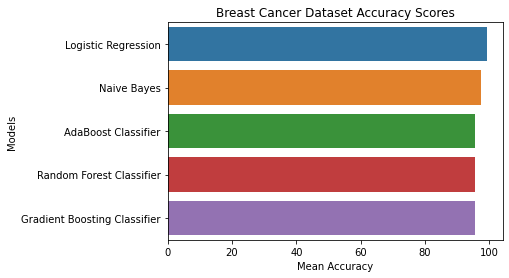

In [22]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(n_estimators=50,learning_rate=1),
    SVC(random_state = 0),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    lgb.LGBMClassifier()
]
evaluate_model(models)

Accuracy: 99.12%
Precision: 0.99
Recall: 1.0
F1 Score: 0.99


Text(16.5, 0.5, 'Predicted Label')

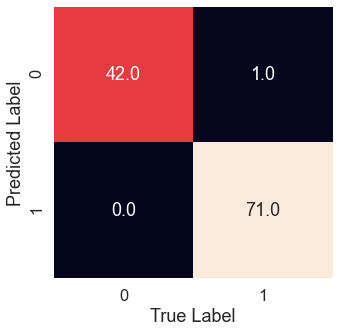

In [34]:
# Define models and parameters for RandomForestClassifier
classifier = LogisticRegression(random_state = random_state)

model = classifier.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Evaluating using accuracy_score metric
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test,Y_pred)
f1 = metrics.f1_score(Y_test,Y_pred)
recall = metrics.recall_score(Y_test,Y_pred)
precision = metrics.precision_score(Y_test,Y_pred)
print("Accuracy: " + str(round((accuracy*100),2))+"%")
print("Precision: " + str(round((precision),2)))
print("Recall: " + str(round((recall),2)))
print("F1 Score: " + str(round((f1),2)))


sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False,fmt=".1f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

## Hyperparameter Tuning


## Logistic Regression (FINAL MODEL)

In [108]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
tuning = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, verbose = True, cv=5, n_jobs = -1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


({'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'},
 0.9538461538461538)

In [24]:
classifier=LogisticRegression(C= 100, max_iter= 100, penalty= 'l2', solver= 'newton-cg')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.9912280701754386


## Decision Tree

In [31]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

tuning = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


({'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5},
 0.9406342182890854)

In [25]:
classifier=DecisionTreeClassifier(max_depth= 5,min_samples_leaf=5,criterion='gini')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.9385964912280702


## Support Vector Machine

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [0, 1, 2, 3, 4, 5, 6]}
 
tuning=GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=2,verbose=1,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 2 folds for each of 525 candidates, totalling 1050 fits


In [26]:
classifier=SVC(C=100,gamma=1,kernel='rbf',degree=0,random_state=10)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.6228070175438597


## Naive Bayes

In [ ]:
param_grid={'var_smoothing': np.logspace(0,-9, num=100)}
tuning=GridSearchCV(estimator=GaussianNB(), param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

In [27]:
classifier=GaussianNB(var_smoothing=  0.0023101297000831605)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.9473684210526315


## KNN

In [ ]:
param_grid =[ { 'n_neighbors' : range(0,20,1),
               'algorithm':['auto','ball_tree','kd_tree','brute'],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
              'p':[0,1,2,3]}]
tuning=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

In [28]:
classifier=KNeighborsClassifier(algorithm='auto',metric= 'minkowski',n_neighbors=1,p=1,weights='uniform')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.9298245614035088


## Random Forest

In [ ]:
param_grid={'n_estimators':range(80,201,5),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2',None]}

tuning=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

In [29]:
classifier=RandomForestClassifier(n_estimators=155,criterion='gini',max_features='auto',random_state=10)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.956140350877193


## FINAL MODEL

Accuracy: 99.12%
Precision: 0.99
Recall: 1.0
F1 Score: 0.99


Text(16.5, 0.5, 'Predicted Label')

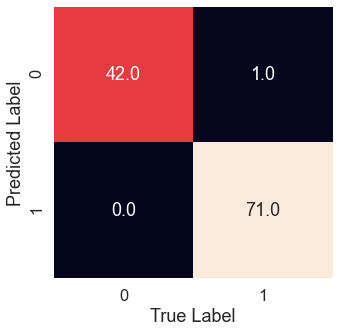

In [32]:
classifier=LogisticRegression(random_state=30)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test,y_pred)
f1 = metrics.f1_score(Y_test,y_pred)
recall = metrics.recall_score(Y_test,y_pred)
precision = metrics.precision_score(Y_test,y_pred)
print("Accuracy: " + str(round((accuracy*100),2))+"%")
print("Precision: " + str(round((precision),2)))
print("Recall: " + str(round((recall),2)))
print("F1 Score: " + str(round((f1),2)))


sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cbar=False,fmt=".1f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [33]:
model

LogisticRegression(random_state=30)

In [59]:
import pickle
pickle.dump(model,open(r'C:\Users\antar\PycharmProjects\HealthCareSystem\Breast Cancer.pkl','wb'))